# Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,SimpleRNN,LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Review Dataset
Dataset banjir tahun 2020

In [2]:
# import dataset 
df = pd.read_csv("DATA KEJADIAN BANJIR.csv")

In [3]:
# melihat 5 data awal
df.head()

,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,batas_bawah_ketinggian_air,...,selisih_ketinggian_air,tanggal_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian
0,Jakarta Pusat,JOHAR BARU,JOHAR BARU,"RW 01, 02, 06, 08",4,4,35,140,10 s/d 30 cm,10,...,20,tgl. 01 Januari,0,0,0,0,140,1,0,0
1,Jakarta Pusat,KEMAYORAN,GUNUNG SAHARI SELATAN,"RW 01, 02, 07, 08",4,4,0,0,10 s/d 70 cm,10,...,60,tgl. 01 Januari,0,0,0,0,0,0,0,0
2,Jakarta Pusat,KEMAYORAN,SERDANG,"RW 01, 02, 06, 07",4,4,0,0,10 s/d 30 cm,10,...,20,tgl. 01 Januari,1,0,0,0,0,0,0,0
3,Jakarta Pusat,SAWAH BESAR,PASAR BARU,"RW 02, 03, 04, 05, 06, 07, 08",7,7,155,625,10 s/d 70 cm,10,...,60,tgl. 01 Januari,0,0,0,0,625,5,0,0
4,Jakarta Pusat,TANAH ABANG,BENDUNGAN HILIR,"RW 07, 09",2,2,52,195,31 s/d 70 cm,31,...,39,tgl. 01 Januari,0,0,0,0,195,6,0,0


In [4]:
#melihat index kolom
df.columns

Index(['kota_administrasi', 'kecamatan', 'kelurahan', 'rw',
       'jumlah_terdampak_rw', 'jumlah_terdampak_rt', 'jumlah_terdampak_kk',
       'jumlah_terdampak_jiwa', 'ketinggian_air', 'batas_bawah_ketinggian_air',
       'batas_atas_ketinggian_air', 'selisih_ketinggian_air',
       'tanggal_kejadian', 'lama_genangan', 'jumlah_meninggal',
       'jumlah_hilang', 'jumlah_luka_berat', 'jumlah_luka_ringan',
       'jumlah_pengungsi_tertinggi', 'jumlah_tempat_pengungsian',
       'nilai_kerugian'],
      dtype='object')

In [5]:
# melihat deskripsi dari tiap kolom
df.describe()

,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,batas_bawah_ketinggian_air,batas_atas_ketinggian_air,selisih_ketinggian_air,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian
count,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.0,1006.0,1006.0,1006.000000,1006.000000,1006.000000,1006.0
mean,1.854871,3.394632,42.152087,150.362823,23.889662,58.802187,34.912525,0.018887,0.0,0.0,0.0,89.715706,1.324056,0.011928,0.0
std,2.352687,5.357315,197.782120,680.570810,20.094423,43.926710,41.299805,0.150095,0.0,0.0,0.0,359.003816,10.636292,0.140563,0.0
min,0.000000,1.000000,0.000000,0.000000,2.000000,5.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
25%,0.000000,1.000000,0.000000,0.000000,10.000000,30.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
50%,1.000000,1.000000,0.000000,0.000000,20.000000,50.000000,20.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
75%,2.000000,3.000000,6.000000,20.750000,30.000000,70.000000,50.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
max,15.000000,46.000000,3762.000000,13450.000000,200.000000,350.000000,340.000000,2.000000,0.0,0.0,0.0,4461.000000,271.000000,3.000000,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   kota_administrasi           1006 non-null   object
 1   kecamatan                   1006 non-null   object
 2   kelurahan                   1006 non-null   object
 3   rw                          1006 non-null   object
 4   jumlah_terdampak_rw         1006 non-null   int64 
 5   jumlah_terdampak_rt         1006 non-null   int64 
 6   jumlah_terdampak_kk         1006 non-null   int64 
 7   jumlah_terdampak_jiwa       1006 non-null   int64 
 8   ketinggian_air              1006 non-null   object
 9   batas_bawah_ketinggian_air  1006 non-null   int64 
 10  batas_atas_ketinggian_air   1006 non-null   int64 
 11  selisih_ketinggian_air      1006 non-null   int64 
 12  tanggal_kejadian            1006 non-null   object
 13  lama_genangan               1006 non-null   int6

In [7]:
# melihat jumlah atribut dan data / dimensi data
df.shape

(1006, 21)

<AxesSubplot:xlabel='kota_administrasi', ylabel='count'>

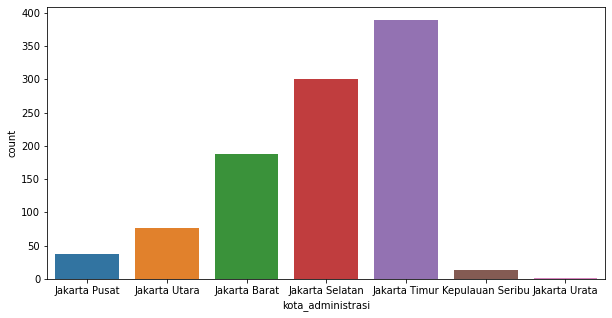

In [8]:
# Plot figure untuk menentukan distribusi kelas
plt.figure(figsize=(10,5))

# menghitung baris setiap kelas
sns.countplot(x="kota_administrasi", data=df)

# Data Preparation

In [9]:
df['rata-rata_ketinggian_air'] = df[["batas_atas_ketinggian_air","batas_bawah_ketinggian_air"]].mean(axis=1)

In [10]:
# menghilangkan kolom yang tidak digunakan
df = df.drop(columns=['ketinggian_air','lama_genangan','jumlah_meninggal','jumlah_hilang','jumlah_luka_berat','jumlah_luka_ringan',
                     'jumlah_pengungsi_tertinggi','jumlah_pengungsi_tertinggi','jumlah_tempat_pengungsian','nilai_kerugian'])

In [11]:
# melihat nilai null untuk semua atribut dan menjumlahkan total nilai null
df.isnull().sum().sort_values(ascending=False)

kota_administrasi             0
kecamatan                     0
kelurahan                     0
rw                            0
jumlah_terdampak_rw           0
jumlah_terdampak_rt           0
jumlah_terdampak_kk           0
jumlah_terdampak_jiwa         0
batas_bawah_ketinggian_air    0
batas_atas_ketinggian_air     0
selisih_ketinggian_air        0
tanggal_kejadian              0
rata-rata_ketinggian_air      0
dtype: int64

In [12]:
# melihat nilai duplikat untuk semua atribut dan menjumlahkan total nilai duplikat
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [13]:
df.head(3)

,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,batas_bawah_ketinggian_air,batas_atas_ketinggian_air,selisih_ketinggian_air,tanggal_kejadian,rata-rata_ketinggian_air
0,Jakarta Pusat,JOHAR BARU,JOHAR BARU,"RW 01, 02, 06, 08",4,4,35,140,10,30,20,tgl. 01 Januari,20.0
1,Jakarta Pusat,KEMAYORAN,GUNUNG SAHARI SELATAN,"RW 01, 02, 07, 08",4,4,0,0,10,70,60,tgl. 01 Januari,40.0
2,Jakarta Pusat,KEMAYORAN,SERDANG,"RW 01, 02, 06, 07",4,4,0,0,10,30,20,tgl. 01 Januari,20.0


In [14]:
# melihat kembali jumlah atribut dan data / dimensi data
df.shape

(921, 13)

In [15]:
# melihat deskripsi dari tiap kolom
df.describe()

,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,batas_bawah_ketinggian_air,batas_atas_ketinggian_air,selisih_ketinggian_air,rata-rata_ketinggian_air
count,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000
mean,2.026059,3.615635,46.042345,164.239957,24.009772,60.054289,36.044517,42.032030
std,2.387325,5.547418,206.282809,709.710126,20.240857,44.885958,42.112752,27.728141
min,0.000000,1.000000,0.000000,0.000000,2.000000,5.000000,0.000000,5.000000
25%,1.000000,1.000000,0.000000,0.000000,10.000000,30.000000,0.000000,20.000000
50%,1.000000,1.000000,0.000000,0.000000,20.000000,50.000000,20.000000,35.000000
75%,3.000000,4.000000,8.000000,27.000000,30.000000,80.000000,50.000000,50.500000
max,15.000000,46.000000,3762.000000,13450.000000,200.000000,350.000000,340.000000,200.000000


# Data Visualization

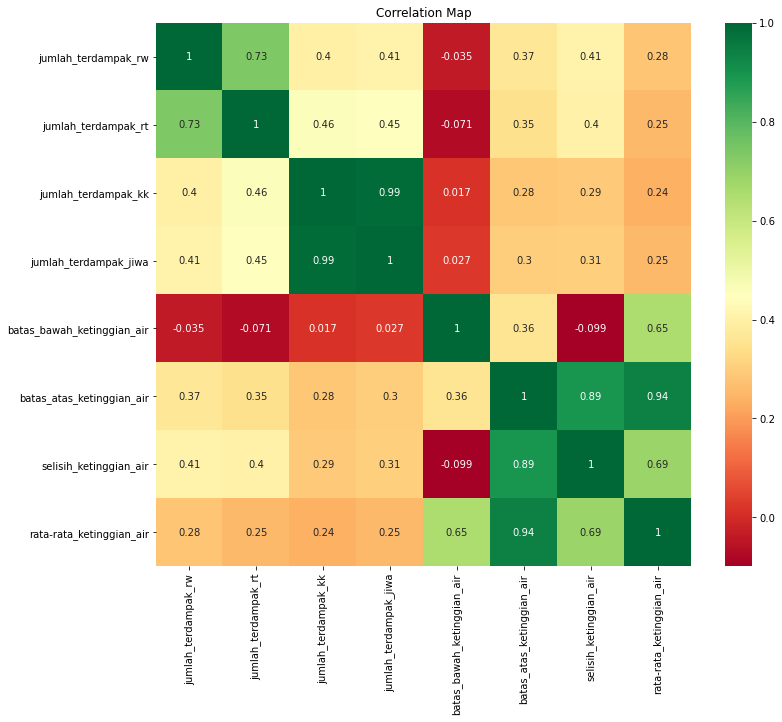

In [16]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')
plt.title('Correlation Map')
plt.show()

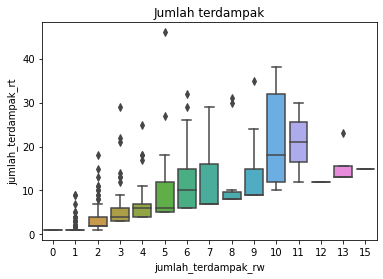

In [17]:
plt.figure()
plt.title("Jumlah terdampak")
sns.boxplot(x=df['jumlah_terdampak_rw'], y=df["jumlah_terdampak_rt"])
plt.show()

<Figure size 432x288 with 0 Axes>

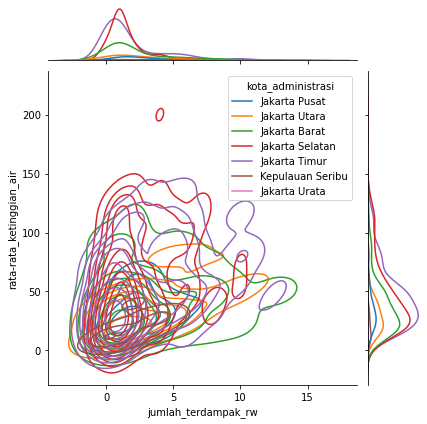

<Figure size 432x288 with 0 Axes>

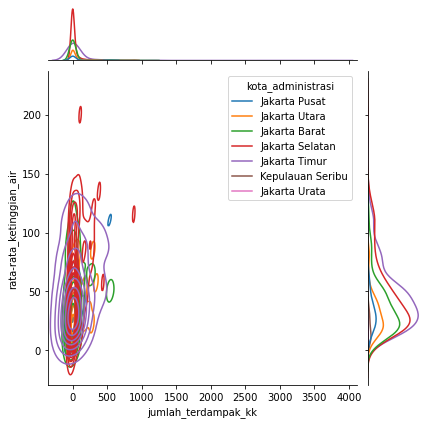

<Figure size 432x288 with 0 Axes>

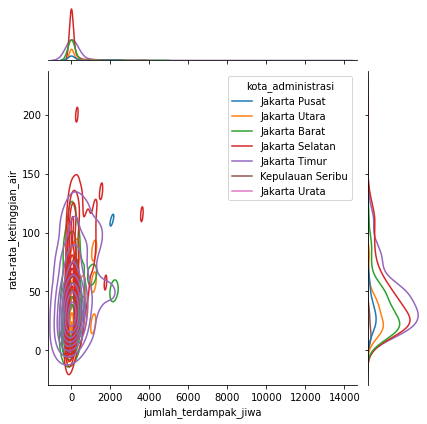

In [18]:
data = ['jumlah_terdampak_rw','jumlah_terdampak_kk','jumlah_terdampak_jiwa']

for i in data:
    plt.figure()
    sns.jointplot(x=df[i], y=df["rata-rata_ketinggian_air"], hue=df['kota_administrasi'], kind='kde')
    plt.show()

# Model Preparation

In [19]:
ketinggian_air_avg = df.iloc[:,-1:].values

In [20]:
ketinggian_air_avg.shape

(921, 1)

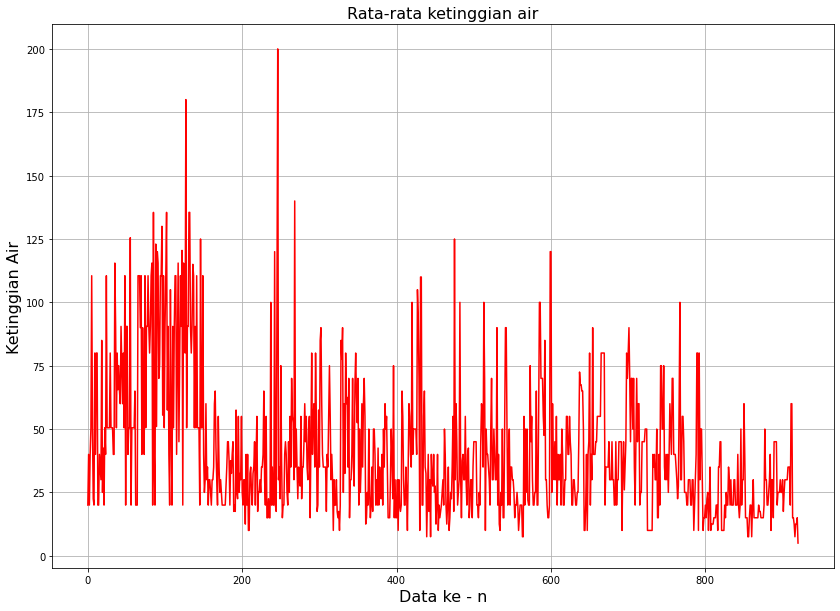

In [21]:
# Visualizing low_data

plt.figure(figsize=(14,10))                 
plt.plot(ketinggian_air_avg,c="red")
plt.title("Rata-rata ketinggian air",fontsize=16)
plt.xlabel("Data ke - n",fontsize=16)
plt.ylabel("Ketinggian Air",fontsize=16)
plt.grid()
plt.show()

In [22]:
scaler = MinMaxScaler(feature_range=(0,1)) 
Low_scaled = scaler.fit_transform(ketinggian_air_avg)

In [23]:
# definisikan variabel step dan train 
step_size = 21
train_x = []
train_y = []

In [24]:
# mengonversi list yang telah dibuat sebelumnya ke array

for i in range(step_size,900):    
    train_x.append(Low_scaled[i-step_size:i,0])
    train_y.append(Low_scaled[i,0])

In [25]:
# membuat fitur dan lists label

train_x = np.array(train_x)
train_y = np.array(train_y)

In [26]:
# cek dimensi data dengan function .shape

print(train_x.shape)

(879, 21)


In [27]:
test_x = train_x[498:]             
train_x = train_x[:498]           
test_y = train_y[498:]  
train_y = train_y[:498]

In [28]:
# reshape data untuk dimasukkan kedalam Keras model
train_x = np.reshape(train_x, (498, step_size, 1))
test_x = np.reshape(test_x, (381, step_size, 1))

In [29]:
# cek kembali dimensi data yang telah di reshape dengan function .shape

print(train_x.shape)
print(test_x.shape)    

(498, 21, 1)
(381, 21, 1)


# RNN Modeling

In [30]:
# buat varibel penampung model RNN
rnn_model = Sequential()

In [31]:
# Output dari SimpleRNN akan menjadi bentuk tensor 2D (batch_size, 40) dengan Dropout sebesar 0.1

rnn_model.add(SimpleRNN(40,activation="tanh",return_sequences=True, input_shape=(train_x.shape[1],1)))
rnn_model.add(Dropout(0.1))

rnn_model.add(SimpleRNN(40,activation="tanh",return_sequences=True))
rnn_model.add(Dropout(0.1))

rnn_model.add(SimpleRNN(40,activation="tanh",return_sequences=False))
rnn_model.add(Dropout(0.1))

# Add a Dense layer with 1 units.
rnn_model.add(Dense(1))

In [32]:
# menambahkan loss function kedalam model RNN dengan tipe MSE

rnn_model.compile(optimizer="adam",loss="MSE")

In [33]:
# fit the model RNN, dengan epoch 100 dan batch size 25

rnn_model.fit(train_x,train_y,epochs=100,batch_size=25)

Epoch 1/100
20/20 [==============================] - 3s 16ms/step - loss: 0.1860
Epoch 2/100
20/20 [==============================] - 0s 10ms/step - loss: 0.1326
Epoch 3/100
20/20 [==============================] - 0s 9ms/step - loss: 0.1151
Epoch 4/100
20/20 [==============================] - 0s 11ms/step - loss: 0.1091
Epoch 5/100
20/20 [==============================] - 0s 11ms/step - loss: 0.0872
Epoch 6/100
20/20 [==============================] - 0s 11ms/step - loss: 0.0802
Epoch 7/100
20/20 [==============================] - 0s 11ms/step - loss: 0.0733
Epoch 8/100
20/20 [==============================] - 0s 11ms/step - loss: 0.0662
Epoch 9/100
20/20 [==============================] - 0s 11ms/step - loss: 0.0584
Epoch 10/100
20/20 [==============================] - 0s 11ms/step - loss: 0.0428
Epoch 11/100
20/20 [==============================] - 0s 10ms/step - loss: 0.0411
Epoch 12/100
20/20 [==============================] - 0s 11ms/step - loss: 0.0371
Epoch 13/100
20/20 [======

In [34]:
# Prediksi Model RNN
rnn_predictions = rnn_model.predict(test_x)

rnn_score = r2_score(test_y,rnn_predictions)

In [35]:
rnn_score

0.17196906939097667

In [36]:
rnn_predictions = scaler.inverse_transform(rnn_predictions)
test_y = scaler.inverse_transform(test_y.reshape(-1,1))

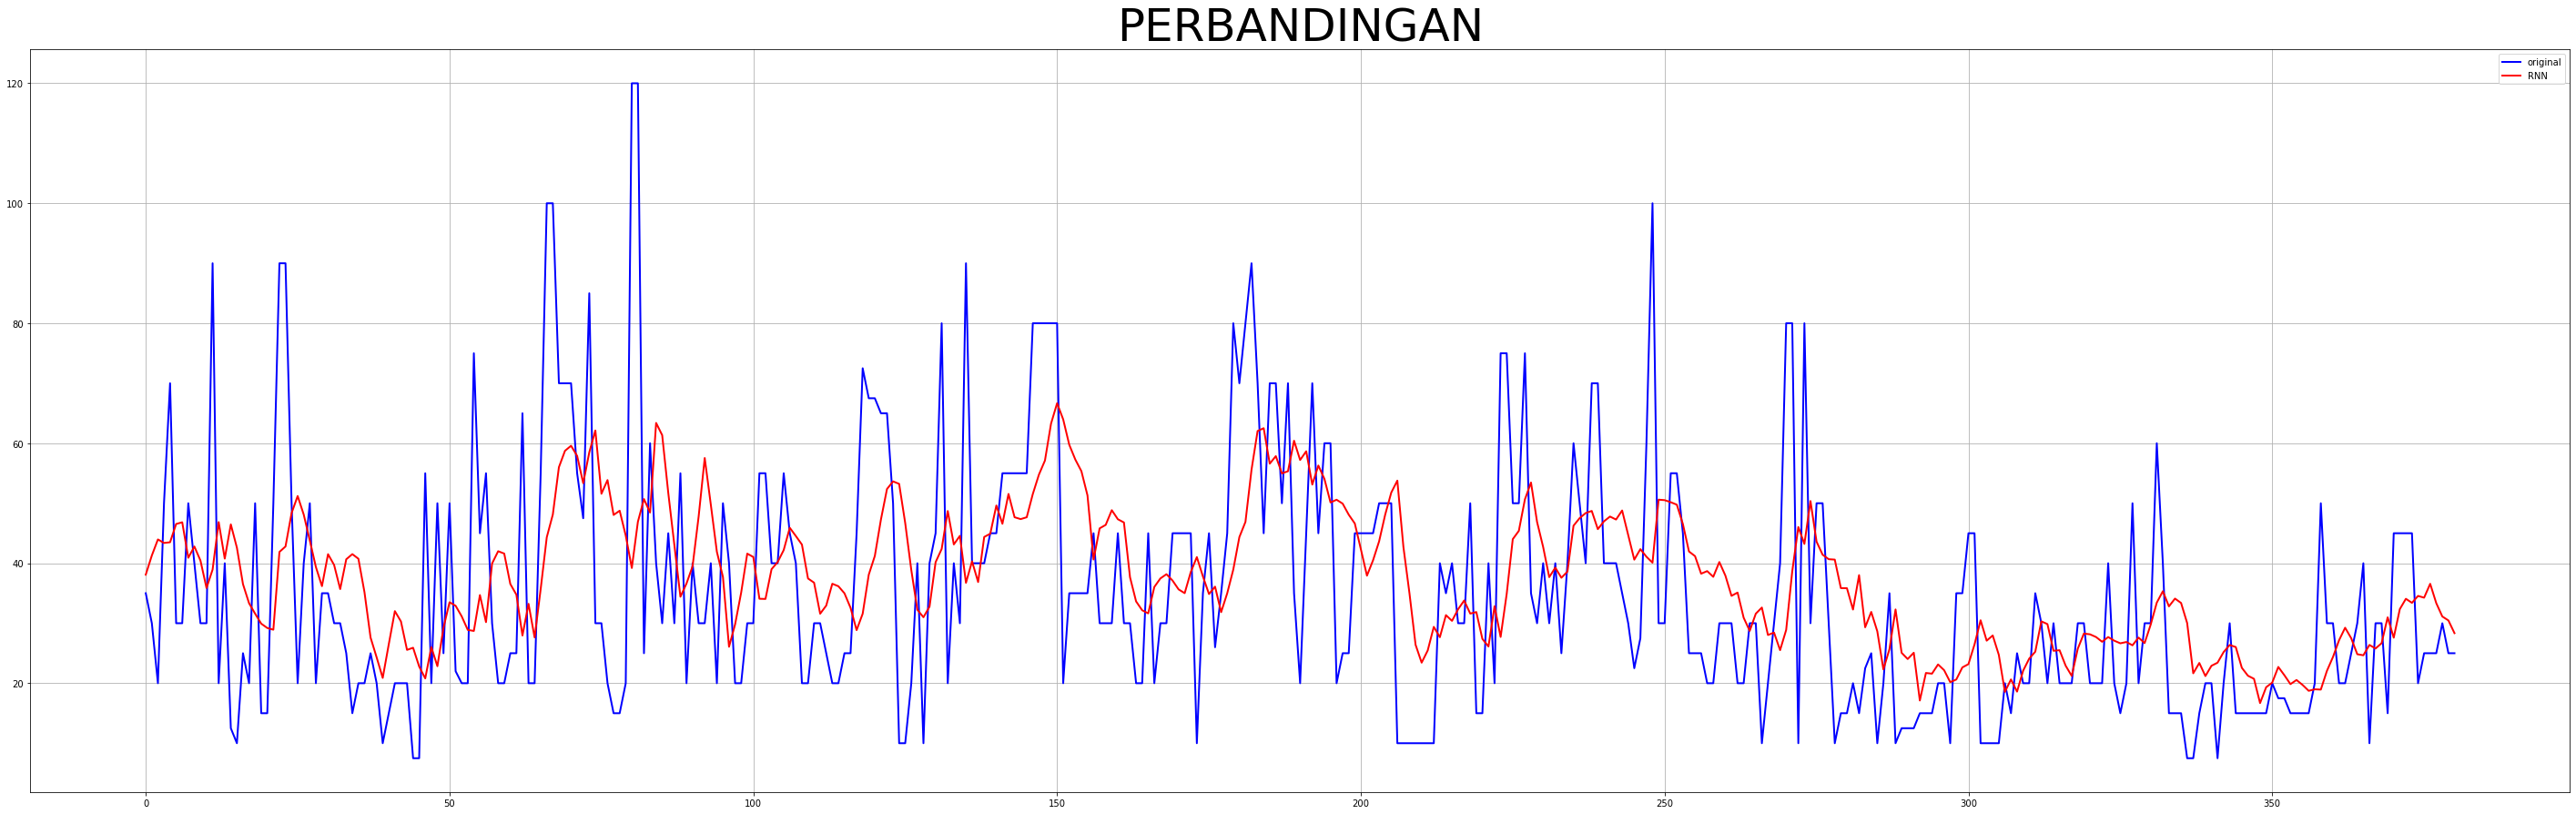

In [37]:
plt.figure(figsize=(50,15))

plt.plot(test_y, c="blue",linewidth=2, label="original")
plt.plot(rnn_predictions, c="red",linewidth=2, label="RNN")
plt.legend()
plt.title("PERBANDINGAN",fontsize=50)
plt.grid()
plt.show()

In [38]:
from tensorflow.keras.models import load_model
rnn_model.save('model.h5')